In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [175]:
female_data = pd.read_csv("ANSUR II FEMALE Public.csv")
female_data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [176]:
male_data = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1")
male_data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [177]:
data = pd.concat([female_data, male_data])
data

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand


In [178]:
data["weightkg"] = data["weightkg"] / 10 #convert to kg
data["stature"] = data["stature"] / 10   #convert to cm
data["Gender"] = data["Gender"].replace(["Female", "Male"], [0,1])

C:\Users\AmirrezA\AppData\Local\Temp\ipykernel_7924\1758159472.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(["Female", "Male"], [0,1])


In [179]:
male_data["weightkg"] = male_data["weightkg"] / 10 #convert to kg
male_data["stature"] = male_data["stature"] / 10   #convert to cm
female_data["weightkg"] = female_data["weightkg"] / 10 #convert to kg
female_data["stature"] = female_data["stature"] / 10   #convert to cm

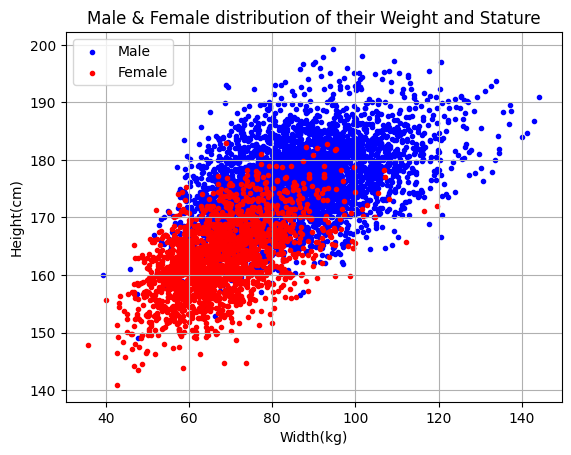

In [180]:
plt.scatter(male_data["weightkg"], male_data["stature"],label = "Male", color = "blue", marker = ".")
plt.scatter(female_data["weightkg"], female_data["stature"], label = "Female", color = "red", marker = ".")
plt.title("Male & Female distribution of their Weight and Stature")
plt.xlabel("Width(kg)")
plt.ylabel("Height(cm)")
plt.legend()
plt.grid()
plt.show()

In [181]:
X = data[["weightkg", "stature"]]
X

,weightkg,stature
0,65.7,156.0
1,53.4,166.5
2,66.3,171.1
3,78.2,166.0
4,88.6,157.2
...,...,...
4077,67.5,168.8
4078,89.6,176.5
4079,83.2,169.0
4080,73.1,171.8


In [182]:
Y = data["Gender"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
4077    1
4078    1
4079    1
4080    1
4081    1
Name: Gender, Length: 6068, dtype: int64

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Training label shape:", Y_train.shape)
print("Testing set shape:", X_test.shape)
print("Testing label shape:", Y_test.shape)

Training set shape: (4854, 2)
Training label shape: (4854,)
Testing set shape: (1214, 2)
Testing label shape: (1214,)


object oriented KNN algorithm

In [184]:
from knn import KNN

KNN = 3

In [185]:
knn = KNN(k=3)
knn.fit(X_train.values, Y_train.values)

In [186]:
test = knn.predict(X_test.values)

In [187]:
for x in test:
    if x == 0:
        print("🙋‍♀️")
    else:
        print("🙋‍♂️")

🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♀️
🙋‍♂️
🙋‍♂️


In [188]:
knn.evaluate(X_test.values, Y_test.values)

0.8253706754530478

In [189]:
confusion_matrix = np.zeros((2,2))

for i in range (len(Y_test)):
    if Y_test.values[i] == 0 and test[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test.values[i] == 0 and test[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test.values[i] == 1 and test[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test.values[i] == 1 and test[i] == 1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[302., 124.],
       [ 88., 700.]])

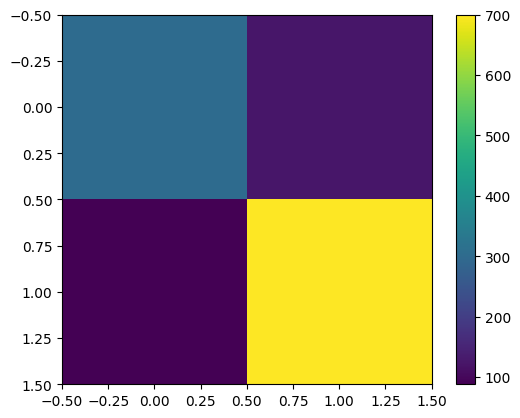

In [190]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

KNN = 5

In [191]:
knn = KNN(k=5)
knn.fit(X_train.values, Y_train.values)

In [192]:
test = knn.predict(X_test.values)

In [193]:
knn.evaluate(X_test.values, Y_test.values)

0.8352553542009885

In [194]:
confusion_matrix = np.zeros((2,2))

for i in range (len(Y_test)):
    if Y_test.values[i] == 0 and test[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test.values[i] == 0 and test[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test.values[i] == 1 and test[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test.values[i] == 1 and test[i] == 1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[305., 121.],
       [ 79., 709.]])

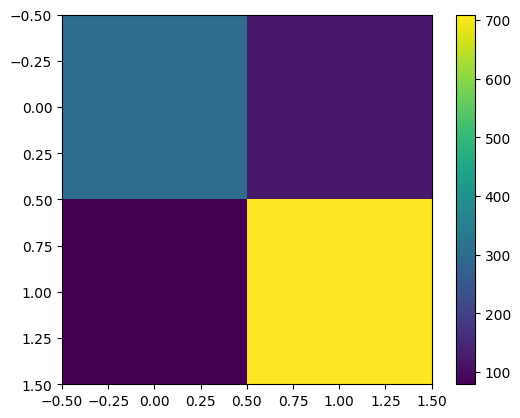

In [195]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

KNN = 7

In [196]:
knn = KNN(k=7)
knn.fit(X_train.values, Y_train.values)

In [197]:
test = knn.predict(X_test.values)

In [198]:
knn.evaluate(X_test.values, Y_test.values)

0.8327841845140033

In [199]:
confusion_matrix = np.zeros((2,2))

for i in range (len(Y_test)):
    if Y_test.values[i] == 0 and test[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test.values[i] == 0 and test[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test.values[i] == 1 and test[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test.values[i] == 1 and test[i] == 1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[304., 122.],
       [ 81., 707.]])

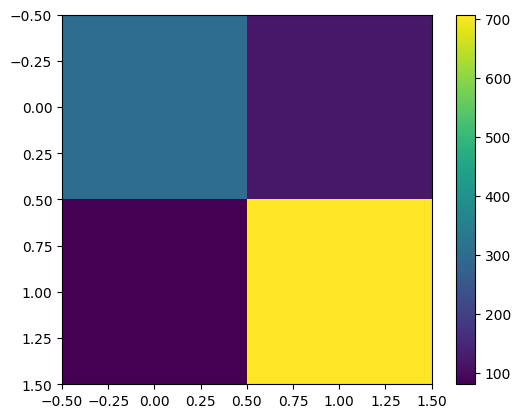

In [200]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

scikit-learn KNN algorithm

KNN = 3

In [201]:
knn = KNeighborsClassifier(n_neighbors=3)

In [202]:
knn.fit(X_train.values, Y_train.values)
final = knn.predict(X_test.values)

In [203]:
accuracy = knn.score(X_test, Y_test)
accuracy

c:\Users\AmirrezA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.8253706754530478

In [204]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [205]:
cm = confusion_matrix(Y_test, final)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[302 124]
 [ 88 700]]


KNN = 5

In [206]:
knn = KNeighborsClassifier(n_neighbors=5)

In [207]:
knn.fit(X_train.values, Y_train.values)
final = knn.predict(X_test.values)

In [208]:
accuracy = knn.score(X_test, Y_test)
accuracy

c:\Users\AmirrezA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.8360790774299836

In [209]:
cm = confusion_matrix(Y_test, final)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[306 120]
 [ 79 709]]


KNN = 7

In [210]:
knn = KNeighborsClassifier(n_neighbors=7)

In [211]:
knn.fit(X_train.values, Y_train.values)
final = knn.predict(X_test.values)

In [212]:
accuracy = knn.score(X_test, Y_test)
accuracy

c:\Users\AmirrezA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.8319604612850082

In [213]:
cm = confusion_matrix(Y_test, final)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[303 123]
 [ 81 707]]
